### Sahil Patil
### 21510060
### T-3

## A)	Linear regression: Single feature vs multiple features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# a.	Download dataset as per your batch. 

In [5]:
df = pd.read_csv('../energydata_complete.csv')
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [10]:
# b.	Preprocessing: Null value handling, standardization, replace categorical values with numeric values (e.g. 0, 1, 2 etc.) 

In [11]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [12]:
# no null values

In [13]:
# categorical value column : 'date' -> not needed -> Drop
df.drop(["date"],axis=1,inplace=True)

In [14]:
# similarly column 'lights' not needed -> Drop
df.drop(["lights"],axis=1,inplace=True)

In [15]:
# Separating the input and output features
x=df.drop(["Appliances"],axis=1)
y=df["Appliances"]

In [16]:
# c.	Data splitting: Split data as 70% train and 30% test using train_test_split function.

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
x_train.shape , x_test.shape

((13814, 26), (5921, 26))

In [19]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

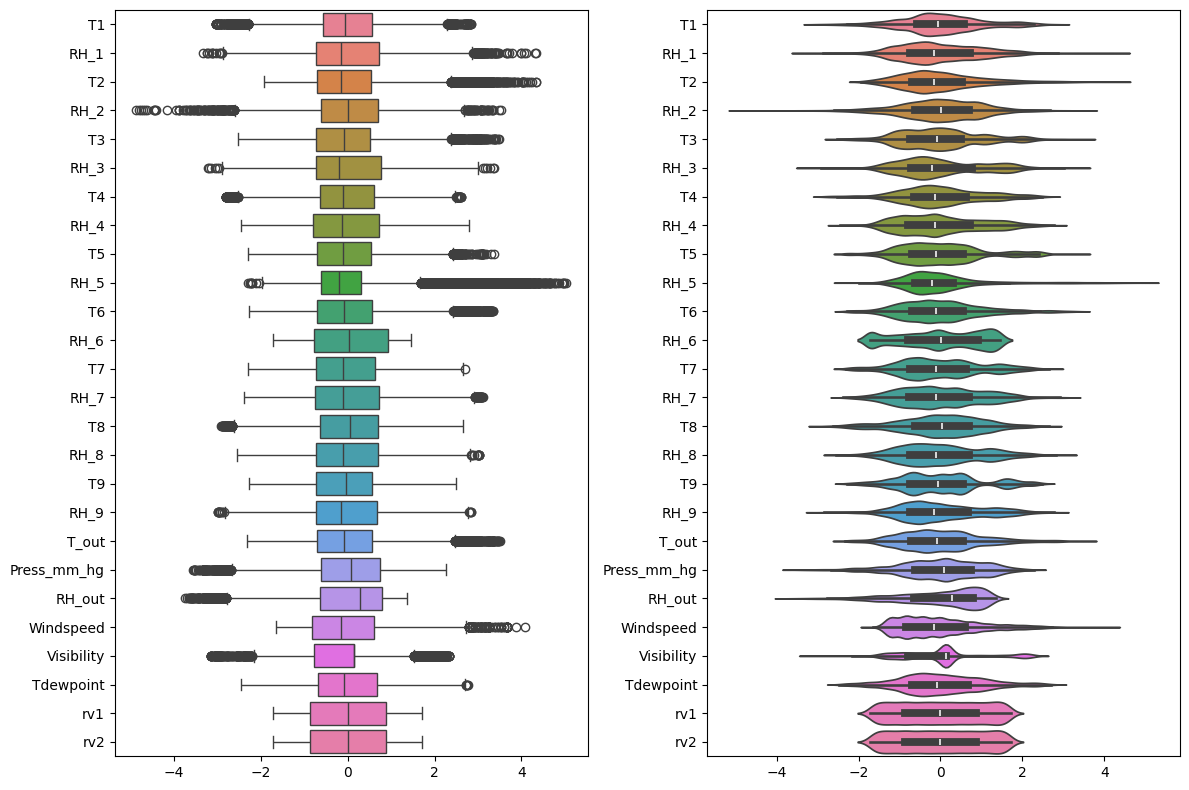

In [25]:
x_scaled=pd.DataFrame(data=x_train_scaled,columns=x.columns)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(data=x_scaled,orient="h")
plt.subplot(1,2,2)
sns.violinplot(data=x_scaled,orient="h")
plt.tight_layout()

In [26]:
# d.	Fit model using fit function taking a single feature at a time and all independent features at a time.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

#### Single Feature at a time:

In [39]:
Train_Error=[]
Test_Error=[]
Coef=[]
Intercept=[]
for col in x_train.columns:
    sf_model=LinearRegression()
    sf_model.fit(x_train[[col]], y_train)

    train_error = mean_squared_error(y_train, sf_model.predict(x_train[[col]]))
    test_error = mean_squared_error(y_test, sf_model.predict(x_test[[col]]))
    
    Coef.append(sf_model.coef_[0])
    Intercept.append(sf_model.intercept_)
    Train_Error.append(train_error)
    Test_Error.append(test_error)

sf_result = pd.DataFrame(data=[[x_train.columns,Coef,Intercept,Train_Error,Test_Error]],columns=["Features","Coeff","Intercept","Train_Error","Test_Error"])
sf_result = pd.DataFrame({"Features":x_train.columns,
                          "Coeff":Coef,
                          "Intercept":Intercept,
                          "Train_Error":Train_Error,
                          "Test_Error":Test_Error})
sf_result

,Features,Coeff,Intercept,Train_Error,Test_Error
0,T1,3.277594,26.647257,10572.237517,10260.418382
1,RH_1,2.309463,4.732694,10516.091029,10239.686334
2,T2,5.539394,-14.946496,10452.284726,10142.387294
3,RH_2,-1.436872,155.827027,10565.823327,10254.836442
4,T3,4.139294,5.561998,10531.246896,10210.278077
5,RH_3,1.181398,51.359299,10585.302850,10290.961281
6,T4,1.906254,57.985847,10584.857344,10281.437756
7,RH_4,0.413976,81.563268,10596.841184,10300.059674
8,T5,0.754579,82.942094,10598.112962,10294.826798
9,RH_5,0.087466,93.271112,10599.432343,10302.413084


#### Multiple Features

In [41]:
mf_model=LinearRegression()
mf_model.fit(x_train, y_train)

LinearRegression()

In [43]:
print("Coefficients: ")
mf_model.coef_

Coefficients: 


array([-3.70720673e-01,  1.63016755e+01, -1.83685199e+01, -1.37394117e+01,
        2.58392608e+01,  4.80249930e+00,  2.79374482e+00,  1.20245004e+00,
       -1.60128345e+00,  2.57869385e-01,  7.36358048e+00,  4.11678134e-01,
        1.03877955e+00, -1.69256851e+00,  9.99235154e+00, -5.78073846e+00,
       -2.11527956e+01, -1.76051496e+00, -1.10722047e+01,  1.70217241e-01,
       -1.09340868e+00,  2.23178697e+00,  2.02590994e-01,  5.70021864e+00,
        3.11012199e+12, -3.11012199e+12])

In [44]:
print("Intercept: ")
mf_model.intercept_

Intercept: 


1.1231925483263865

In [46]:
train_error = mean_squared_error(y_train, mf_model.predict(x_train))
test_error = mean_squared_error(y_test, mf_model.predict(x_test))

print(f"Train Error: {train_error}")
print(f"Test Error: {test_error}")

Train Error: 9066.015634548454
Test Error: 8768.717116590089


## B)	Answer following questions (include question and answer as markdown cell in your notebook)

#### a.	Provide a general multiple linear regression equation and explain all the terms. 

#### b.	Explain the concept of a dummy variable and how such variables are calculated. Why is it necessary to convert nominal variables to dummy variables when performing linear regression?

#### c.	Explore and mention assumptions in linear regression with suitable explanation.